In [33]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.datasets import load_iris

### **Завдання 1** (5 балів)

Розгляньте біноміальний розподіл ([документація](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom)). Цей розподіл є прикладом дискретного розподілу. Яка основна різниця між дискретним і неперервним розподілами? Зверніть увагу на функцію **pmf** з документації.

1. Зобразіть графіки функції розподілу і функції імовірностей (pmf) для $B(n = 10, p = 0.6)$. 
2. Знайдіть наступні числа: $F(5)$, $F^{-1}(0.9)$, $P( 2\le X \le 7))$

У неперевному розподілі дані можуть приймати будь-яке (нескінченну кількість) значення у певному діапазоні, тоді як у дискретному - скінченну кількість конкретних значень

[Text(0.5, 1.0, 'PMF (n=10, p=0.6)')]

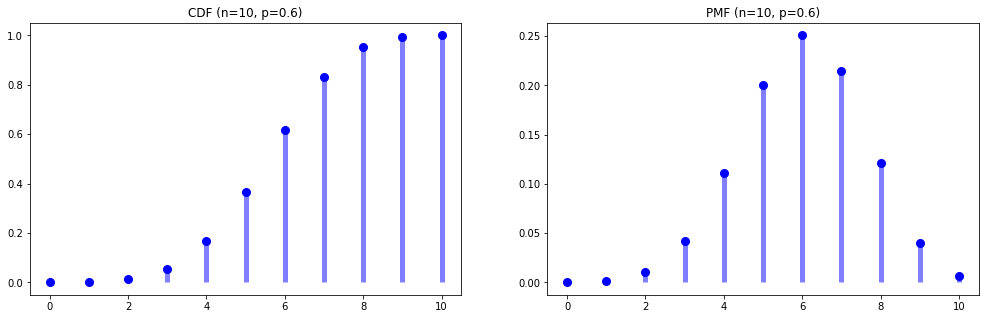

In [ ]:
# 1
n, p = 10, 0.6
x = np.arange(0, n+1)

binom_cdf = st.binom.cdf(x, n, p)
binom_pmf = st.binom.pmf(x, n, p)

fig = plt.figure(figsize=(17,5))
ax_1 = fig.add_subplot(1, 2, 1)
ax_1.plot(x, binom_cdf, 'bo', ms=8)
ax_1.vlines(x, 0, binom_cdf, colors='b', lw=5, alpha=0.5)
ax_1.set(title = f"CDF (n={n}, p={p})")
ax_2 = fig.add_subplot(1, 2, 2)
ax_2.plot(x, binom_pmf, 'bo', ms=8)
ax_2.vlines(x, 0, binom_pmf, colors='b', lw=5, alpha=0.5)
ax_2.set(title = f"PMF (n={n}, p={p})")

In [ ]:
# 2
st.binom.cdf(5, n, p), st.binom.ppf(0.9, n, p), st.binom.cdf(7, n, p) - st.binom.cdf(2, n, p)

(0.36689674240000003, 8.0, 0.8204156928)

### **Завдання 2** (5 балів)

Для даних нижче даних порахуйте всі характеристики локації, дисперсії та симетрії і зробіть висновок про дані з цих чисел.

In [8]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
data = housing.data["LotArea"]
data = data.to_numpy()
data

array([ 8450.,  9600., 11250., ...,  9042.,  9717.,  9937.])

In [9]:
len(data)

1460

In [10]:
max(data)

215245.0

In [ ]:
print("Mean:", np.mean(data))
print("Median:", np.median(data))
print("Mode:", st.mode(data))
print("10%-quantile:", np.percentile(data, 10))
print("90%-quantile:", np.percentile(data, 90))
print("Variance:", np.var(data))
print("Standard deviation:", np.std(data))
print("Skewness:", st.skew(data))
print("Kurtosis:", st.kurtosis(data))

Mean: 10516.828082191782
Median: 9478.5
Mode: ModeResult(mode=array([7200.]), count=array([25]))
10%-quantile: 5000.0
90%-quantile: 14381.70000000001
Variance: 99557412.90400591
Standard deviation: 9977.846105448105
Skewness: 12.195142125084478
Kurtosis: 202.5437927513529


Показники дисперсії свідчать про сильний розмах у даних, вірогідно тут присутні аутлаєри, які викривлюють загальну картину, а саме надзвичайно великі житлові ділянки. Екстремально велику позитивну (правобічну?) асиметрію у даних показує також і показник симетрії.

### **Завдання 3** (5 балів)

Для вказаних нижче даних зобразіть гістограму. До якого розподілу можуть підходити ці дані? Знайдіть параметри припускаючи, що це нормальний розподіл. Намалюйте функцію густини нормального розподілу з правильними параметрами поверх гістограми.

{'boxes': [<matplotlib.lines.Line2D at 0x7efd0fb41d90>],
 'caps': [<matplotlib.lines.Line2D at 0x7efd0edc93d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7efd0fa0cc50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7efd0edca690>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7efd0edc88d0>,
  <matplotlib.lines.Line2D at 0x7efd0edc9350>]}

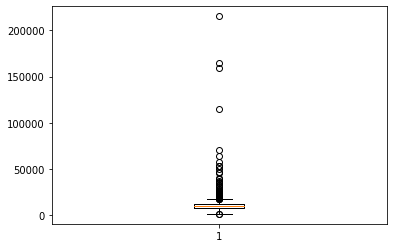

In [23]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
data = housing.data["LotArea"]
plt.boxplot(data)

У боксплоті видно, що у цьому датасеті багато аутлаєрів, тому для репрезантативної картини варто для початку видалити їх. Оскільки на початку мені не був зрозумілий розподіл, я використала метод міжквартильного розмаху. Спочатку я просто відфільтрувала дані які менше ніж np.percentile() із параметром 0.95, оскільки він мені показався найбільш приближеним до діаграми, але потім використала метод з цієї статті https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/). Після цього гістограма отримала форму розподілу, близького до нормального

In [24]:
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
outliers = [x for x in data if x < lower or x > upper]
outliers_removed = [x for x in data if x > lower and x < upper]

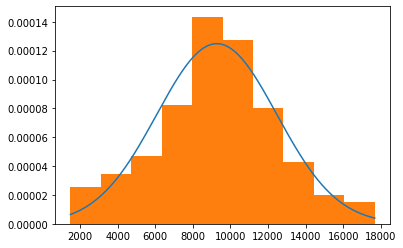

In [51]:
m, s = st.norm.fit(outliers_removed)
x = [x for x in range(int(min(outliers_removed)), int(max(outliers_removed)), 1)]
density_values = st.norm.pdf(x, loc = m, scale = s)
plt.plot(x, density_values)
plt.hist(outliers_removed, density = True)
plt.show()

### **Завдання 4**  (5 балів)

У статистиці, якщо даних у вибірці не достатньо, дуже часто замість нормального розподілу припускають, що середнє значення розподіляється за допомогою t-розподілу. t-розподіл має тяжчі хвости, відповідно інтервали довіри зазвичай ширші. Т-розподіл приймає параметр **df**, яке позначає кільість даних. Виведіть на одному графіку густину стандартного нормального розподілу і t-розподіну з 5 різними параметрами **df** (вибирайте максимум 100). З якого +- значення t розподіл стає вже дуже подібним до нормального? Як це можна використати, коли ми працюємо з вибіркою?

**scipy.stats.t scipy.stats.norm**

t-розподіл наближається до нормального, коли вибірка перевищує значення 30. Таким чином, якщо у нас вибірка менше, потрібно використовувати t-розподіл, оскільки він збільшує інтервали довіри і таким чином враховує більшу невизначеність.

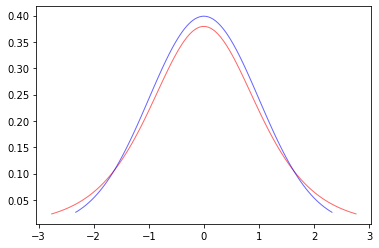

In [41]:
from scipy.stats import t
from scipy.stats import norm

fig, ax = plt.subplots(1, 1)

tx = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)

nx = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

ax.plot(tx, t.pdf(tx, df = 5),
       'r-', lw=1, alpha=0.6)
ax.plot(nx, norm.pdf(nx),
       'b-', lw=1, alpha=0.6)

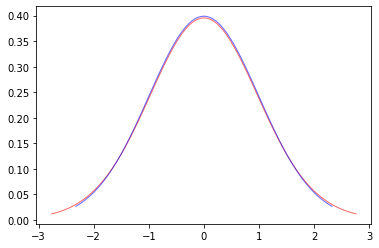

In [39]:
fig, ax = plt.subplots(1, 1)
ax.plot(tx, t.pdf(tx, df = 30),
       'r-', lw=1, alpha=0.6)
ax.plot(nx, norm.pdf(nx),
       'b-', lw=1, alpha=0.6)

### **Завдання 5**  (5 балів)

Знайдіть інтервал довіри для **середнього** даних (90%, 95%, 99%) використовуючи *st.norm.interval*. Виведіть їх числами та/або на графіку. Зробіть те саме лише для випадкових 50 рядків даних (np.random.choice(data, 50)). Як помінялись інтервали? Поясніть чому так сталось?

In [34]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
data = housing.data["LotArea"]

Я використала дані з завдання 3, в якому видалила аутлаєри з цього датасету. Без цього розкид інтервалів довіри був надзвичайно широким, а середнє - високим

In [35]:
lotarea_data = pd.Series(outliers_removed)
sample_data = np.random.choice(lotarea_data, 50)

Для випадкових 50 рядків даних інтервали довіри стали ширшими, оскільки кількість спостережень зменшилась. Ми бачимо з формули середнього квадратичного відхилення середнього арифметичного, що вона зворотньо пропорційна квадратному кореню розмірів вибірки. Тому чим вона більша, тим меншим будуть інтервали довіри, тобто тим впевненіше можна судити про точність очікуваного значення 

In [39]:
n = 100
m1, st1 = lotarea_data.mean(), lotarea_data.std()/np.sqrt(n)
m2, st2 = sample_data.mean(), sample_data.std()/np.sqrt(n)
print("data_mean CI 99%: " + str(st.norm.interval(alpha=0.99, loc=m1, scale=st1)))
print("data_mean CI 95%: " + str(st.norm.interval(alpha=0.95, loc=m1, scale=st1)))
print("data_mean CI 90%: " + str(st.norm.interval(alpha=0.90, loc=m1, scale=st1)))
print("sample_mean CI 99%: " + str(st.norm.interval(alpha=0.99, loc=m2, scale=st2)))
print("sample_mean CI 95%: " + str(st.norm.interval(alpha=0.95, loc=m2, scale=st2)))
print("sample_mean CI 90%: " + str(st.norm.interval(alpha=0.90, loc=m2, scale=st2)))

data_mean CI 99%: (8449.11331993047, 10095.960727517411)
data_mean CI 95%: (8645.988982971308, 9899.085064476572)
data_mean CI 90%: (8746.721332506966, 9798.352714940915)
sample_mean CI 99%: (8817.659618576927, 10655.940381423072)
sample_mean CI 95%: (9037.42056447467, 10436.179435525328)
sample_mean CI 90%: (9149.862275524889, 10323.73772447511)
